In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("../Traffic Data Applied Linear Algebra.csv")
# Data
df_numeric = df[['Season', 'DayOfWeek', 'Period', 'PricePerGB', 'Arrivals', 'Departures']]
#print(df_numeric.cov())
print(df_numeric.corr())


              Season  DayOfWeek    Period  PricePerGB  Arrivals  Departures
Season      1.000000  -0.026965  0.027044    0.023982  0.002589   -0.000959
DayOfWeek  -0.026965   1.000000 -0.031651   -0.097568  0.052593    0.115001
Period      0.027044  -0.031651  1.000000   -0.007523 -0.000145   -0.047701
PricePerGB  0.023982  -0.097568 -0.007523    1.000000 -0.837874   -0.847698
Arrivals    0.002589   0.052593 -0.000145   -0.837874  1.000000    0.719520
Departures -0.000959   0.115001 -0.047701   -0.847698  0.719520    1.000000


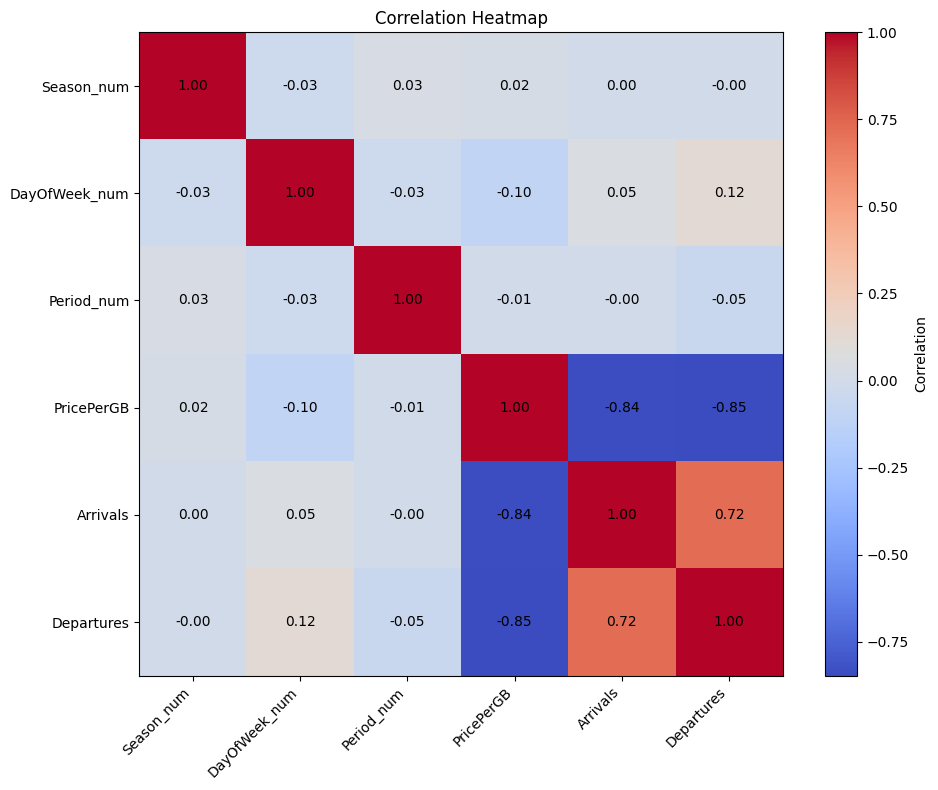

In [6]:
# Encode categorical columns
df['Season_num'] = df['Season'].astype('category').cat.codes
df['DayOfWeek_num'] = df['DayOfWeek'].astype('category').cat.codes
df['Period_num'] = df['Period'].astype('category').cat.codes

# Select numeric columns
df_numeric = df[['Season_num', 'DayOfWeek_num', 'Period_num', 'PricePerGB', 'Arrivals', 'Departures']]

# ✅ Compute correlation matrix
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')

# Labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)

# Color bar
plt.colorbar(label="Correlation")

# Add values to heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        value = corr.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
